### Data Processing: find how many days to stability

In [59]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
covid_original = pd.read_csv("owid-covid-data.csv")

In [61]:
country=["Germany"
         ,"Russia"
         ,"United Kingdom","France","Italy","Spain","Ukraine","Poland","Romania","Netherlands","Belgium","Czech Republic","Greece","Portugal"
,"Sweden"
,"Hungary"
,"Belarus"
,"Austria"
,"Serbia"
,"Switzerland"
,"Bulgaria"
,"Denmark"
,"Finland"
,"Slovakia"
,"Norway"
,"Ireland"
,"Croatia"
,"Moldova"
,"Bosnia and Herzegovina"
,"Albania"
,"Lithuania"
,"North Macedonia"
,"Slovenia"
,"Latvia"
,"Estonia"
,"Montenegro"
,"Luxembourg"
,"Malta"
,"Iceland"
,"Canada"
,"Australia"
,"New Zealand"]

##### Germany Testing

In [62]:
germany_case = covid_original.loc[(covid_original["location"] =="Germany")&(covid_original["total_cases"]>=30), ["date","total_cases"]]

In [63]:
germany_case["date"] = pd.to_datetime(germany_case["date"],format="%Y-%m-%d")

In [64]:
type(germany_case["date"])

pandas.core.series.Series

In [65]:
germany_case.total_cases.median() 

137439.0

In [66]:
germany_case.head(10)

,date,total_cases
7754,2020-02-28,47
7755,2020-02-29,57
7756,2020-03-01,111
7757,2020-03-02,129
7758,2020-03-03,157
7759,2020-03-04,196
7760,2020-03-05,262
7761,2020-03-06,400
7762,2020-03-07,684
7763,2020-03-08,847


In [67]:
x = germany_case["total_cases"]
y = germany_case["date"]

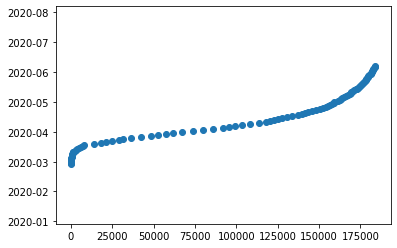

In [68]:
plt.scatter(x,y)

In [69]:
date_over_median = covid_original.loc[(covid_original["location"] =="Germany")&(covid_original["total_cases"]>=137439), ["date","total_cases"]]

In [70]:
date_over_median

,date,total_cases
7804,2020-04-18,137439
7805,2020-04-19,139897
7806,2020-04-20,141672
7807,2020-04-21,143457
7808,2020-04-22,145694
7809,2020-04-23,148046
7810,2020-04-24,150383
7811,2020-04-25,152438
7812,2020-04-26,154175
7813,2020-04-27,155193


In [71]:
date_over_mean_list = date_over_median["date"].tolist()

In [72]:
date_over_mean_list[0]

'2020-04-18'

In [73]:
date = []
case = []

In [74]:
for i in germany_case["date"]:
    date.append(i)

In [75]:
for i in germany_case["total_cases"]:
    case.append(i)

In [76]:
change_rate = []

In [77]:
for index, value in enumerate(case):
    try:
        rate = ((case[index+1] - value)/value)
        change_rate.append(rate)
    except:
        pass
    

In [78]:
change_rate = np.asarray(change_rate)

In [79]:
data = {"Date":date[1:], "Change Rate":change_rate}

In [80]:
df = pd.DataFrame(data)

In [81]:
df["Date"] = pd.to_datetime(df["Date"],format="%Y-%m-%d")

In [82]:
df.head(10)

,Date,Change Rate
0,2020-02-29,0.212766
1,2020-03-01,0.947368
2,2020-03-02,0.162162
3,2020-03-03,0.217054
4,2020-03-04,0.248408
5,2020-03-05,0.336735
6,2020-03-06,0.526718
7,2020-03-07,0.710000
8,2020-03-08,0.238304
9,2020-03-09,0.064935


In [83]:
new_df = df.loc[df["Date"]>"2020-04-09",:]
new_df_quantile = new_df.quantile([0.25,0.5,0.75])

In [84]:
new_df_average = new_df_quantile["Change Rate"].tolist()

In [85]:
new_df_average

[0.0025129535089663023, 0.0049040524912957704, 0.013176507262753129]

##### Germany reach stabiliy on 2020/05/10, and it took Germany 72 days to control the pandemic

In [86]:
stable_date = new_df.loc[df["Change Rate"]<0.4,:"Date"]

In [87]:
stable_date_list = stable_date["Date"].tolist()

In [88]:
stable_date.head()

,Date
41,2020-04-10
42,2020-04-11
43,2020-04-12
44,2020-04-13
45,2020-04-14


In [89]:
day_to_stable = stable_date_list[1] - germany_case["date"].min()

In [90]:
day_to_stable

Timedelta('43 days 00:00:00')

### Testing for all countries

In [91]:
def mean_date(i):
    country_case = covid_original.loc[(covid_original["location"] ==i)&(covid_original["total_cases"]>=30), ["date","total_cases"]]
    country_case["date"] = pd.to_datetime(country_case["date"],format="%Y-%m-%d")
    mean_num = country_case.total_cases.mean()
    date_over_mean = covid_original.loc[(covid_original["location"] ==i)&(covid_original["total_cases"]>=mean_num), ["date","total_cases"]]
    date_over_mean_list = date_over_mean["date"].tolist()
    date = date_over_mean_list[0]
    return date

In [92]:
mean = mean_date("Russia")

In [93]:
mean

'2020-05-05'

In [94]:
def moving_rate_table(country):
    date = []
    case = []
    country_case = covid_original.loc[(covid_original["location"] ==country)&(covid_original["total_cases"]>=30), ["date","total_cases"]]
    for i in country_case["date"]:
        date.append(i)
    for i in country_case["total_cases"]:
        case.append(i)
    change_rate = []
    for index, value in enumerate(case):
        try:
            rate = ((case[index+1] - value)/value)*100
            change_rate.append(rate)
        except:
            pass
    change_rate = np.asarray(change_rate)
    data = {"Date":date[1:], "Change Rate":change_rate}
    df = pd.DataFrame(data)
    df["Date"] = pd.to_datetime(df["Date"],format="%Y-%m-%d")
    return df

In [95]:
change_df = moving_rate_table("Germany")

In [96]:
change_df.head()

,Date,Change Rate
0,2020-02-29,21.276596
1,2020-03-01,94.736842
2,2020-03-02,16.216216
3,2020-03-03,21.705426
4,2020-03-04,24.840764


#### Get the benchmark of stability

In [97]:
def calculate_quarlitle(df,b):
    new_df = df.loc[df["Date"]>b,:]
    new_df_quantile = new_df.quantile([0.25,0.5,0.75])
    new_df_average = new_df_quantile["Change Rate"].tolist()
    get_average = new_df_average[1]
    return get_average

#### Results for error countries

In [98]:
mean = mean_date("New Zealand")

In [99]:
country_df = moving_rate_table("New Zealand")

In [100]:
new_df = country_df.loc[country_df["Date"]>mean,:]

#### Montenegro: 3/25 - 5/7 (43)
#### Iceland: 3/6 - 5/3 (58)
#### New Zealand: 3/20 - 5/12(53)

In [101]:
country_case = covid_original.loc[(covid_original["location"] =="New Zealand")&(covid_original["total_cases"]>=30), ["date","total_cases"]]

In [102]:
# Germany Testing
average = calculate_quarlitle(a,b)

NameError: name 'a' is not defined

In [103]:
average

NameError: name 'average' is not defined

In [104]:
def days_to_stable(i,df,date,mean):
    new_df = df.loc[df["Date"]>date,:]
    mean = mean-0.1
    stable_date = new_df.loc[df["Change Rate"]<mean,:"Date"]
    stable_date_list = stable_date["Date"].tolist()
    country_case = covid_original.loc[(covid_original["location"] ==i)&(covid_original["total_cases"]>=30), ["date","total_cases"]]
    country_case["date"] = pd.to_datetime(country_case["date"],format="%Y-%m-%d")
    day_to_stable = stable_date_list[2] - country_case["date"].min()
    return day_to_stable

In [202]:
days_to_stable("Germany",change_df,mean,average)

Timedelta('78 days 00:00:00')

In [210]:
dic = {}

In [211]:
for i in country:
    try:
        mean = mean_date(i)
        change_df = moving_rate_table(i)
        average = calculate_quarlitle(change_df,mean)
        to_stable = days_to_stable(i,change_df,mean,average)
        dic[i] = to_stable
    except:
        print(f"{i} occured error")

North Macedonia occured error
Montenegro occured error
Iceland occured error
New Zealand occured error


In [212]:
dic

{'Germany': Timedelta('78 days 00:00:00'),
 'Russia': Timedelta('75 days 00:00:00'),
 'United Kingdom': Timedelta('80 days 00:00:00'),
 'France': Timedelta('73 days 00:00:00'),
 'Italy': Timedelta('81 days 00:00:00'),
 'Spain': Timedelta('73 days 00:00:00'),
 'Ukraine': Timedelta('60 days 00:00:00'),
 'Poland': Timedelta('59 days 00:00:00'),
 'Romania': Timedelta('69 days 00:00:00'),
 'Netherlands': Timedelta('75 days 00:00:00'),
 'Belgium': Timedelta('74 days 00:00:00'),
 'Czech Republic': Timedelta('56 days 00:00:00'),
 'Greece': Timedelta('52 days 00:00:00'),
 'Portugal': Timedelta('55 days 00:00:00'),
 'Sweden': Timedelta('61 days 00:00:00'),
 'Hungary': Timedelta('58 days 00:00:00'),
 'Belarus': Timedelta('69 days 00:00:00'),
 'Austria': Timedelta('60 days 00:00:00'),
 'Serbia': Timedelta('60 days 00:00:00'),
 'Switzerland': Timedelta('77 days 00:00:00'),
 'Bulgaria': Timedelta('59 days 00:00:00'),
 'Denmark': Timedelta('71 days 00:00:00'),
 'Finland': Timedelta('66 days 00:00:00'

In [265]:
usa =  covid_original.loc[(covid_original["location"] =="United States")&(covid_original["total_cases"]>=30), ["date","total_cases"]]

In [266]:
usa.min()

date           2020-02-22
total_cases            35
dtype: object

In [267]:
usa.max()

date           2020-06-07
total_cases       1920061
dtype: object

### Machine Training

In [310]:
covid_data = pd.read_csv("COVID Data Collection - Data for Peak Prediction.csv")

In [311]:
covid_data.set_index("Country",inplace = True)

In [312]:
covid_data.head()

,Young Population (Aged under 15 ),Working Age Population (Aged between 15 - 64),Elderly population (Aged 65 and over),Population,Population Density (per Km2),Political Ideology,Death Rate,Social Distancing (days),Wearing Face mask (days),14 day Quarantine (days),Boarders (days),School closures (days),Lockdown,Days to Peak,Days to Stability
Country,,,,,,,,,,,,,,,
USA,18.62%,65.35%,16.03%,32823952,34,Democratic,5.60%,103,0,149,109,106,Y,106,NaN
Germany,13.50%,65.00%,21.47%,83783942,240,Democratic,4.70%,49,44,70,91,52,Y,100,78.0
Russia,17.91%,67.41%,14.67%,145934462,9,Authoritarian,1.25%,45,64,0,104,0,Y,85,75.0
United Kingdom,18.90%,63.10%,18.00%,67886011,281,Democratic,14.20%,99,15,60,105,87,Y,97,80.0
France,18.1 %,62.2 %,19.7 %,65273511,119,Democratic,18.97%,55,51,50,70,55,Y,100,73.0


In [313]:
covid_data.replace("Y",1,inplace = True)
covid_data.replace("N",0,inplace=True)

In [314]:
covid_data.replace("Democratic",1,inplace = True)
covid_data.replace("Authoritarian",0,inplace = True)

In [315]:
covid_data.dtypes

Young Population\n(Aged under 15 )                 object
Working Age Population\n(Aged between 15 - 64)     object
Elderly population\n(Aged 65 and over)             object
Population                                          int64
Population Density \n(per Km2)                      int64
Political Ideology                                  int64
Death Rate                                         object
Social Distancing\n(days)                           int64
Wearing Face mask\n(days)                           int64
14 day Quarantine\n(days)                           int64
Boarders\n(days)                                    int64
School closures\n(days)                             int64
Lockdown                                            int64
Days to Peak                                        int64
Days to Stability                                 float64
dtype: object

In [316]:
covid_data["Young Population\n(Aged under 15 )"] = covid_data["Young Population\n(Aged under 15 )"].str.rstrip('%').astype('float') / 100.0
covid_data["Working Age Population\n(Aged between 15 - 64)"] = covid_data["Working Age Population\n(Aged between 15 - 64)"].str.rstrip('%').astype('float') / 100.0
covid_data["Elderly population\n(Aged 65 and over)"] = covid_data["Elderly population\n(Aged 65 and over)"].str.rstrip("%").astype('float') / 100.0

In [317]:
covid_data["Death Rate"] = covid_data["Death Rate"].str.rstrip('%').astype('float') / 100.0

In [318]:
covid_data.dtypes

Young Population\n(Aged under 15 )                float64
Working Age Population\n(Aged between 15 - 64)    float64
Elderly population\n(Aged 65 and over)            float64
Population                                          int64
Population Density \n(per Km2)                      int64
Political Ideology                                  int64
Death Rate                                        float64
Social Distancing\n(days)                           int64
Wearing Face mask\n(days)                           int64
14 day Quarantine\n(days)                           int64
Boarders\n(days)                                    int64
School closures\n(days)                             int64
Lockdown                                            int64
Days to Peak                                        int64
Days to Stability                                 float64
dtype: object

In [441]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [442]:
covid_world = covid_data.copy()
covid_world = covid_world.drop(["North Macedonia"])

In [443]:
X = covid_world.loc["Germany":,:"Days to Peak"]

In [444]:
len(X)

41

In [445]:
Y = covid_world["Days to Stability"].tolist()

In [446]:
Y = Y[1:]

In [447]:
len(Y)

41

In [448]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

In [449]:
x_train.shape

(32, 14)

In [450]:
regr = LinearRegression()

In [451]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [471]:
y_predict = regr.predict(x_test)

In [58]:
plt.scatter(y_test, y_predict)
plt.plot([0,100],[0,100],"r")
plt.xlabel("Actual days")
plt.ylabel("Predicted days")

NameError: name 'y_test' is not defined

### Difference between actual and prediction

In [472]:
y_predict - y_test

array([-11.42478866,  -7.01131727,  14.26821353,  -4.80630449,
         2.27647685, -15.83947919,   8.78121688,   6.67414073,
        47.37559251])

In [464]:
a = x_test.index

In [465]:
a = a.tolist()

#### Testing Data / Actual Days

In [470]:
covid_data.loc[a,"Days to Stability"]

Country
Ireland           68.0
Luxembourg        59.0
Albania           50.0
Italy             81.0
Belgium           74.0
Slovenia          66.0
Moldova           47.0
Czech Republic    56.0
Malta             40.0
Name: Days to Stability, dtype: float64

In [467]:
y_predict = y_predict.tolist()

In [468]:
predict_df = pd.DataFrame({"Country":a, "Prediction(days)":y_predict})

#### Testing Data Predicted Days

In [469]:
predict_df

,Country,Prediction(days)
0,Ireland,56.575211
1,Luxembourg,51.988683
2,Albania,64.268214
3,Italy,76.193696
4,Belgium,76.276477
5,Slovenia,50.160521
6,Moldova,55.781217
7,Czech Republic,62.674141
8,Malta,87.375593


### Correlation table of feature and days to stability

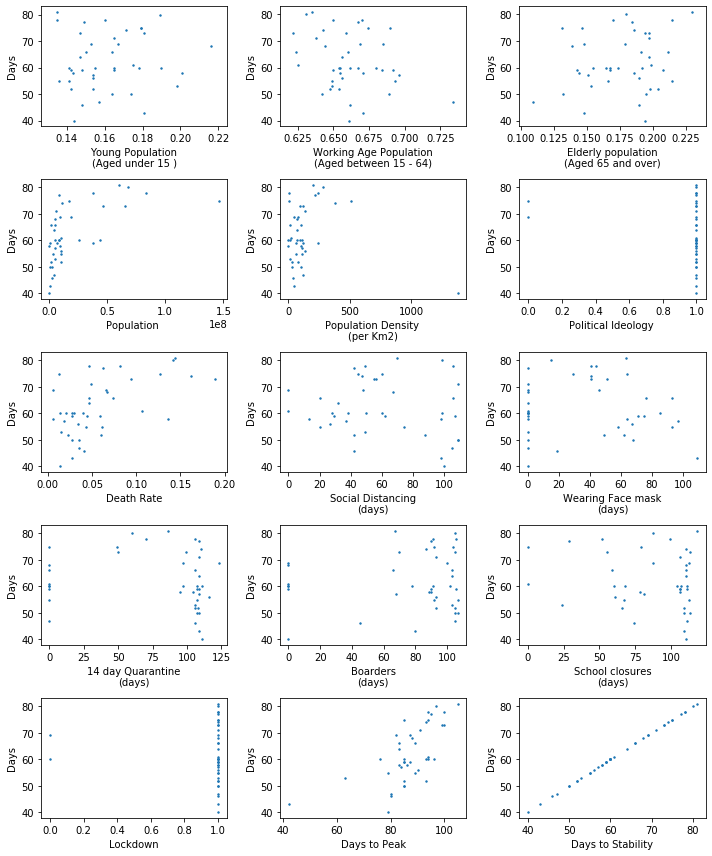

In [498]:
days_to_stability = covid_data.iloc[1:,-1].to_numpy()
plt.figure(figsize=(10,12))
for i, feature in enumerate(covid_data.columns):
    plt.subplot(5,3,i+1)
    features = covid_data.iloc[1:,i].to_numpy()
    plt.scatter(features, days_to_stability, s=2)
    plt.ylabel("Days")
    plt.xlabel(feature)
    plt.tight_layout()

### USA prediction

In [485]:
usa = covid_data.loc["USA",:"Days to Peak"]

In [486]:
usa

Young Population\n(Aged under 15 )                1.862000e-01
Working Age Population\n(Aged between 15 - 64)    6.535000e-01
Elderly population\n(Aged 65 and over)            1.603000e-01
Population                                        3.282395e+07
Population Density \n(per Km2)                    3.400000e+01
Political Ideology                                1.000000e+00
Death Rate                                        5.600000e-02
Social Distancing\n(days)                         1.030000e+02
Wearing Face mask\n(days)                         0.000000e+00
14 day Quarantine\n(days)                         1.490000e+02
Boarders\n(days)                                  1.090000e+02
School closures\n(days)                           1.060000e+02
Lockdown                                          1.000000e+00
Days to Peak                                      1.060000e+02
Name: USA, dtype: float64

In [487]:
usa = usa.values.reshape(1,14)

In [488]:
usa_predict = regr.predict(usa)

In [489]:
usa_predict

array([75.48650677])

In [490]:
usa_starting_date = covid_original.loc[(covid_original["location"] =="United States")&(covid_original["total_cases"]>=30), ["date","total_cases"]]

In [494]:
usa_starting_date

,date,total_cases
21285,2020-02-22,35
21286,2020-02-23,35
21287,2020-02-24,35
21288,2020-02-25,53
21289,2020-02-26,53
21290,2020-02-27,59
21291,2020-02-28,60
21292,2020-02-29,66
21293,2020-03-01,69
21294,2020-03-02,89


//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


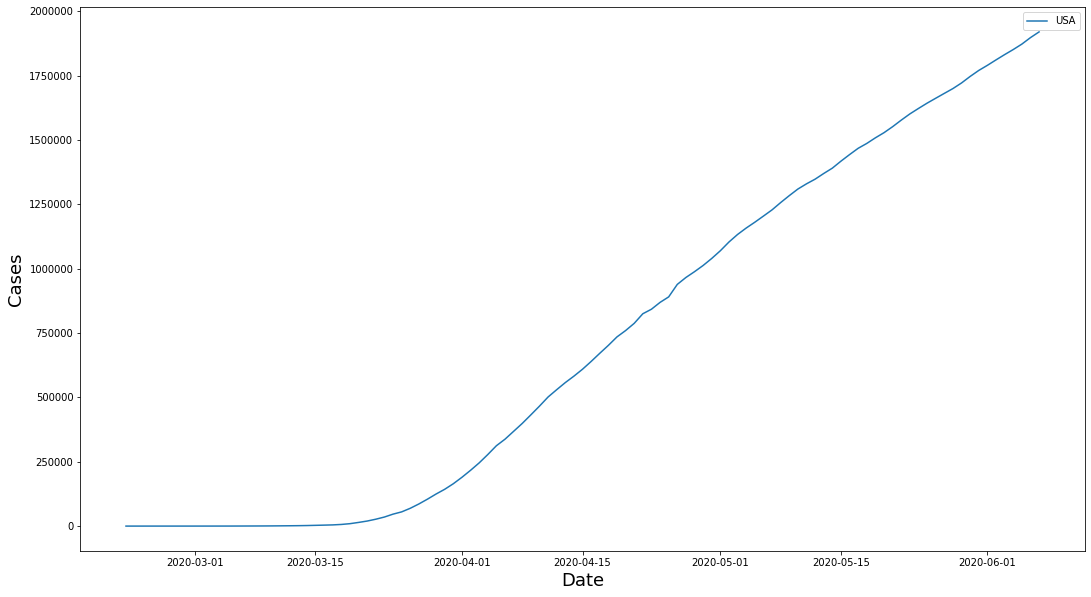

In [497]:
plt.figure(figsize = (18,10))
plt.plot(usa_starting_date["date"],usa_starting_date["total_cases"], label = "USA")
plt.xlabel('Date',fontsize=18)
plt.ylabel('Cases',fontsize=18)
plt.legend(loc='upper right')